In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [27]:
# States
states = ['Symptoms', 'PrimaryCare', 'WatchWait', 'ChestXRay', 'NoduleDetected', 'Biopsy', 'Diagnosis', 'LostFollowUp']
state_indices = {state: idx for idx, state in enumerate(states)}
num_states = len(states)
print("State Indices:", state_indices)


State Indices: {'Symptoms': 0, 'PrimaryCare': 1, 'WatchWait': 2, 'ChestXRay': 3, 'NoduleDetected': 4, 'Biopsy': 5, 'Diagnosis': 6, 'LostFollowUp': 7}


In [28]:
# Initialize transition matrix with zeros
A = np.zeros((num_states, num_states))

# Define transitions
# From Symptoms
A[state_indices['Symptoms'], state_indices['PrimaryCare']] = 0.8  # 80% see a doctor
A[state_indices['Symptoms'], state_indices['LostFollowUp']] = 0.2  # 20% do not seek care and are lost

# From PrimaryCare
A[state_indices['PrimaryCare'], state_indices['WatchWait']] = 0.6  # 60% cases are watchful waiting
A[state_indices['PrimaryCare'], state_indices['ChestXRay']] = 0.4  # 40% proceed to imaging

# From WatchWait
A[state_indices['WatchWait'], state_indices['ChestXRay']] = 0.3   # 30% eventually get imaging
A[state_indices['WatchWait'], state_indices['LostFollowUp']] = 0.5  # 50% are lost to follow-up
A[state_indices['WatchWait'], state_indices['WatchWait']] = 0.2    # 20% remain in watchful waiting

# From ChestXRay
A[state_indices['ChestXRay'], state_indices['NoduleDetected']] = 0.7  # 70% detect nodules
A[state_indices['ChestXRay'], state_indices['WatchWait']] = 0.2      # 20% return to watchful waiting
A[state_indices['ChestXRay'], state_indices['LostFollowUp']] = 0.1   # 10% are lost to follow-up

# From NoduleDetected
A[state_indices['NoduleDetected'], state_indices['Biopsy']] = 0.9  # 90% proceed to biopsy
A[state_indices['NoduleDetected'], state_indices['LostFollowUp']] = 0.1  # 10% are lost to follow-up

# From Biopsy
A[state_indices['Biopsy'], state_indices['Diagnosis']] = 0.8  # 80% are diagnosed with cancer
A[state_indices['Biopsy'], state_indices['LostFollowUp']] = 0.2  # 20% are lost to follow-up

# Absorbing states
A[state_indices['Diagnosis'], state_indices['Diagnosis']] = 1.0
A[state_indices['LostFollowUp'], state_indices['LostFollowUp']] = 1.0


In [29]:
# Observations
observations = ['Cough', 'PhysicianEncounter', 'NoAction', 'ImagingPerformed', 'NoduleFound', 'BiopsyPerformed', 'CancerDiagnosed', 'NoObservation']
observation_indices = {obs: idx for idx, obs in enumerate(observations)}
num_observations = len(observations)
print("Observation Indices:", observation_indices)


Observation Indices: {'Cough': 0, 'PhysicianEncounter': 1, 'NoAction': 2, 'ImagingPerformed': 3, 'NoduleFound': 4, 'BiopsyPerformed': 5, 'CancerDiagnosed': 6, 'NoObservation': 7}


In [30]:
# Initialize emission probability matrix with zeros
B = np.zeros((num_states, num_observations))

# Define emissions
B[state_indices['Symptoms'], observation_indices['Cough']] = 1.0
B[state_indices['PrimaryCare'], observation_indices['PhysicianEncounter']] = 1.0
B[state_indices['WatchWait'], observation_indices['NoAction']] = 1.0
B[state_indices['ChestXRay'], observation_indices['ImagingPerformed']] = 1.0
B[state_indices['NoduleDetected'], observation_indices['NoduleFound']] = 1.0
B[state_indices['Biopsy'], observation_indices['BiopsyPerformed']] = 1.0
B[state_indices['Diagnosis'], observation_indices['CancerDiagnosed']] = 1.0
B[state_indices['LostFollowUp'], observation_indices['NoObservation']] = 1.0

In [31]:
def simulate_patient_journey(A, B, start_state, max_steps=10):
    current_state = start_state
    states_visited = [current_state]
    observations_made = []
    
    for _ in range(max_steps):
        # Generate observation
        obs_probs = B[current_state]
        observation = np.random.choice(np.arange(num_observations), p=obs_probs)
        observations_made.append(observation)
        
        # Check if current state is absorbing
        if A[current_state, current_state] == 1.0:
            break  # Absorbing state reached
        
        # Transition to next state
        trans_probs = A[current_state]
        next_state = np.random.choice(np.arange(num_states), p=trans_probs)
        states_visited.append(next_state)
        current_state = next_state
        
    return states_visited, observations_made

# Simulate a patient journey starting from 'Symptoms'
start_state = state_indices['Symptoms']
states_visited, observations_made = simulate_patient_journey(A, B, start_state)

# Convert indices back to state and observation names
visited_states_names = [states[idx] for idx in states_visited]
observations_names = [observations[idx] for idx in observations_made]

print("States Visited:")
for state in visited_states_names:
    print(f" - {state}")

print("\nObservations Made:")
for obs in observations_names:
    print(f" - {obs}")


States Visited:
 - Symptoms
 - LostFollowUp

Observations Made:
 - Cough
 - NoObservation


In [75]:
def simulate_patient_journey(A, B, start_state, max_steps=10):
    current_state = start_state
    states_visited = [current_state]
    observations_made = []
    
    for _ in range(max_steps):
        # Generate observation
        obs_probs = B[current_state]
        observation = int(np.random.choice(range(num_observations), p=obs_probs).astype(int))
        observations_made.append(observation)
        
        # Check if current state is absorbing
        if A[current_state, current_state] == 1.0:
            break  # Absorbing state reached
        
        # Transition to next state
        trans_probs = A[current_state]
        next_state = int(np.random.choice(range(num_states), p=trans_probs))
        states_visited.append(next_state)
        current_state = next_state
        
    return states_visited, observations_made

# Simulate a patient journey starting from 'Symptoms'
start_state = state_indices['Symptoms']
states_visited, observations_made = simulate_patient_journey(A, B, start_state)

# Convert indices back to state and observation names
visited_states_names = [states[idx] for idx in states_visited]
observations_names = [observations[idx] for idx in observations_made]

print("States Visited:")
for state in visited_states_names:
    print(f" - {state}")

print("\nObservations Made:")
for obs in observations_names:
    print(f" - {obs}")


States Visited:
 - Symptoms
 - PrimaryCare
 - ChestXRay
 - NoduleDetected
 - Biopsy
 - Diagnosis

Observations Made:
 - Cough
 - PhysicianEncounter
 - ImagingPerformed
 - NoduleFound
 - BiopsyPerformed
 - CancerDiagnosed


In [119]:
all_states = []
for _ in range(100000):
    s, o = simulate_patient_journey(A, B, 0, 100)
    all_states.append(s)

In [ ]:
flattened_sequences = np.concatenate(all_states)
flattened_sequences = np.array(flattened_sequences).reshape(-1, 1) 
sequence_lengths = [len(seq) for seq in all_states]

In [121]:
from hmmlearn import hmm

In [122]:
model = hmm.MultinomialHMM(n_components=8, n_iter=1000)
model.fit(flattened_sequences, lengths=sequence_lengths)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


MultinomialHMM(n_components=8, n_iter=1000,
               n_trials=array([0, 7, 0, ..., 3, 2, 7], shape=(479229,)),
               random_state=RandomState(MT19937) at 0x106EA0440)

In [138]:
T = np.round(model.transmat_, 2)
T

array([[0.69, 0.03, 0.16, 0.  , 0.  , 0.12, 0.  , 0.  ],
       [0.1 , 0.  , 0.  , 0.03, 0.19, 0.65, 0.  , 0.02],
       [0.09, 0.05, 0.  , 0.03, 0.38, 0.02, 0.44, 0.  ],
       [0.12, 0.  , 0.  , 0.72, 0.  , 0.  , 0.16, 0.  ],
       [0.14, 0.03, 0.  , 0.69, 0.1 , 0.  , 0.  , 0.04],
       [0.  , 0.  , 0.01, 0.04, 0.94, 0.01, 0.  , 0.  ],
       [0.02, 0.  , 0.94, 0.  , 0.  , 0.  , 0.02, 0.  ],
       [0.09, 0.86, 0.  , 0.  , 0.05, 0.  , 0.01, 0.  ]])

In [110]:
A

array([[0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.3, 0. , 0. , 0. , 0.5],
       [0. , 0. , 0.2, 0. , 0.7, 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [101]:
np.set_printoptions(suppress=True)


In [134]:
A

array([[0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.3, 0. , 0. , 0. , 0.5],
       [0. , 0. , 0.2, 0. , 0.7, 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [136]:
A.shape

(8, 8)

In [135]:
print("Transition Matrix:\n", model.transmat_)
print("\nEmission Probabilities:\n", model.emissionprob_)

Transition Matrix:
 [[0.68954957 0.02846197 0.16143536 0.00005281 0.         0.11997129
  0.00051906 0.00000994]
 [0.10069201 0.00000197 0.00390828 0.03274464 0.19374745 0.65203152
  0.         0.01687413]
 [0.08931879 0.04774652 0.         0.02959701 0.37523749 0.01644885
  0.43836207 0.00328927]
 [0.11961717 0.00000218 0.00008412 0.71939936 0.00000004 0.00253174
  0.15835636 0.00000904]
 [0.13901295 0.02878599 0.         0.69029116 0.1039186  0.00000037
  0.00294019 0.03505073]
 [0.00000045 0.0000044  0.00547084 0.0354031  0.94334807 0.01122989
  0.00049619 0.00404706]
 [0.02189518 0.00000097 0.94451436 0.00012277 0.00000003 0.00473582
  0.02492182 0.00380904]
 [0.0886351  0.85843049 0.00000001 0.00010434 0.04722385 0.00017864
  0.00542745 0.00000011]]

Emission Probabilities:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


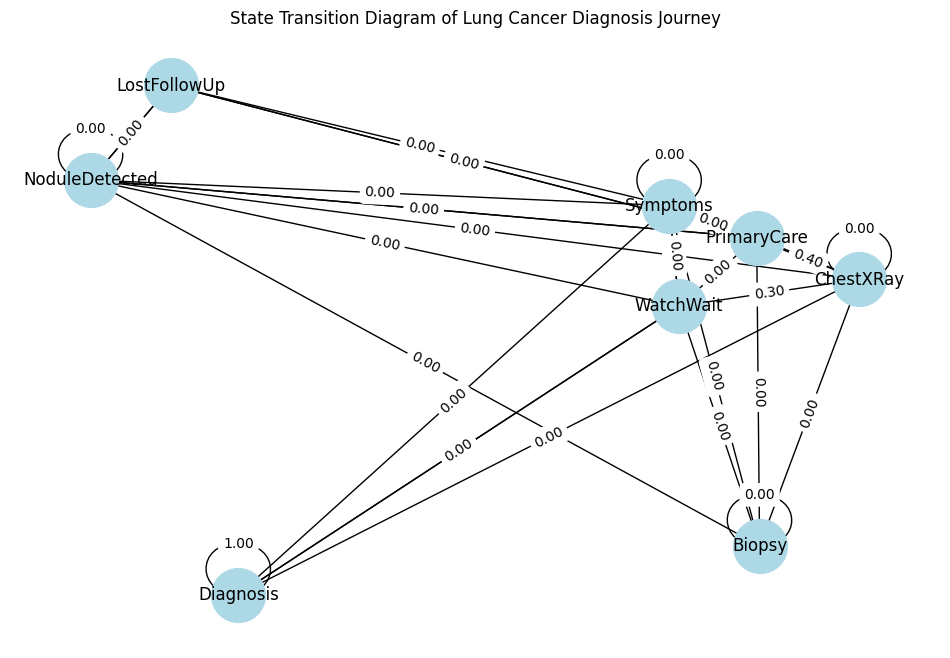

In [127]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(states)

# Add edges with weights (transition probabilities)
for i in range(num_states):
    for j in range(num_states):
        if T[i, j] > 0.01:
            G.add_edge(states[i], states[j], weight=A[i, j])

# Draw the graph
pos = nx.spring_layout(G, seed=100, dim=2)  # positions for nodes

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
formatted_edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels)

plt.title('State Transition Diagram of Lung Cancer Diagnosis Journey')
plt.axis('off')
plt.show()


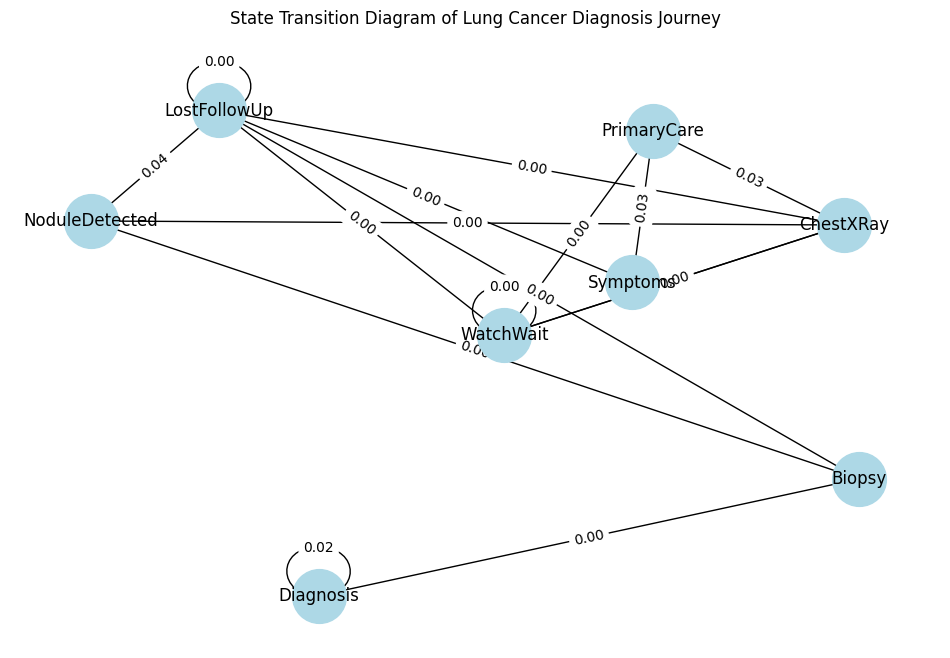

In [141]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(states)

# Add edges with weights (transition probabilities)
for i in range(num_states):
    for j in range(num_states):
        if A[i, j] > 0:
            G.add_edge(states[i], states[j], weight=T[i, j])

# Draw the graph
pos = nx.spring_layout(G, seed=100, dim=2)  # positions for nodes

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
formatted_edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels)

plt.title('State Transition Diagram of Lung Cancer Diagnosis Journey')
plt.axis('off')
plt.show()


In [ ]:
# Q
# multiple diagnosis instead of one 
# multiple entry points
# one symptom only (?)

# solve differentials
# ? to objectify that

# test - r/o -> bayesian stuff
# costs to run test ($, time, health)



# look into QA datasets
# Look into UK biobank --> need access

# Look into sepsis perhaps? or anything that is in-patient e.g. fever
# MIMIC will be good source for this 
